# Python Jupyter Notebooks and ThinkDSP Library Tutorial

## If you are familiar with Python and Python notebooks just skip to the "Signals, waves, plot and audio" section and the mixing example at the end.

Disclaimer: We are following the **ThinkDSP book** by **Allen B. Downey**. Most notebooks are adapted from the book and the ThinkX library. 

## Python Jupyter Notebooks

We will be using the Python programming language to introduce you to how sound waveforms or singals are processed using computer programs (algorithms), something that signal processing engineers do a lot of. You will **not** be expected to write your own code, unless you want to for one of your proejcts or to further your learning. For a quick overview of "Why Python?", see [here](http://news.codecademy.com/why-learn-python), mainly “Python’s popularity in data science and machine learning is probably the main driver of its fast growth” Including its versatility in so many domains where free Python libraries exist for most engineering projects you maybe interested in. So it's not a bad thing to learn this programming language at any level you feel comfortable with. For example, we will be using the ThinkDSP *library* in this class (DSP stands for Digital Signal Processing) starting with examples in this tutorial. Libraries are a bunch of code or functions that have been written and shared by others, to make our lives easier. These functions encapsulate (hide) a lot of code and instead of having to rewrite the same code over and over, we execute (run, do) *a function call* to one of these libraries. 

Sometimes it's much easier to use a tool like Audacity which is a DAW (Digital Audio Workstation: an electronic device or application software used for recording, editing and producing audio files) to perform certain tasks, but as you learn more and more Python, the sky is the limit to what you may want to explore and you won't be restricted with what a DAW has to offer.  

### Resources
The web is full of resouces on Python and Notebooks, here are a few but do your own search as well. 
- This is a [quick reference](https://medium.com/ibm-data-science-experience/markdown-for-jupyter-notebooks-cheatsheet-386c05aeebed) on how to format the text in your notebook. Formatted text is called Markdown.
- This is an [interactive book](http://interactivepython.org/runestone/static/thinkcspy/index.html) that takes you step by step into learning Python 
- This is a [good crash course](https://ehmatthes.github.io/pcc/) and the pdf of the textbook is available on the class Canvas cite under code/resources


### Running your own Jupyter notebook:
If you import this code into a Jupuyter notebook, or simply upload this notebook into your Jupyter hub, you can click on the code cell below and edit parameters. Note in the top menu that one of the pull down menues indicates **Code** as opposed to **Markdown** where we enter formatted text that you are reading here. In the cell, you can change the frequency and offsets and then press the combination *control-enter* keys, or click on the. 'Run' button in the menu above, to run the code and see the effect of the changes you made. 

**Syntax**
When writing code, you have to respect the syntax (rules) that Python expects, otherwise you get errors. Think of syntax as the grammar of a programming language. Human beings can handle grammatical errors when listening to someone or reading, and perhaps can use context and manage to understand the words even if the grammar is incorrect. Sometimes we make mistakes in our interpretation, but communication keeps flowing. In a computer language, there is no such flexibility. Syntax errors stop all communication between you and the computer. The computer cannot make assumptions and move on (we are not talking about AI here!) For example, you can't remove the commas separating the parameters inside the function call make_wave() in the cell a few steps below. 

**Interpreted vs. Compiled languages**
Python, is an interpreted language, meaning you don't have to compile and then run the whole program; you could run the code one line at a time, and the *interpreter* immediately interprets your code one line at a time and gives you the results of your code. For a compiled language on the other hand, the whole program has to compile correctly wihtout any errors before you can see any results. 

If you get an error in a line, you would still get results from the lines above before the program stops. Usually error messages tell you exactly what you need to do to fix a problem, so they are your friends and don't be afraid of them! 

**Variables**
If you never programmed before, you should get familiar with the concept of a variable that you define by setting it equal to something (like the output of a function call, or a value like a number...). You are free to name variables as you wish, try to make them mean something to the context of the code. Typing the name of the variable, will print its value when you run the code. If you change the value of a variable, you have to rerun the cell that contains that change to make it stick.  

In [3]:
my_variable_1 = "hello world"
my_variable_1


'hello world'

In [4]:
my_variable_2 = 10.0
my_variable_2

10.0


### Jupyter Hub
A hub is a collection of servers (any computer can be a server, though usually you need ones that are powerful enough to serve multiple users), that are used to run this environment. They are remote, in other words, when you run your code here, you are actually running it on a remote server and not your local computer that you are on right now. Each of these servers that are used for the class already have all the libraries necesary for us installed on them. The reason we use the Jupyter Hub is so that you don't have to worry about setting up your environment. To access the server you are running on, you can use a terminal window (click on the *New* drop-down menu from the home directory listing and choose terminal). 

Below is some Python code using the ThinkDSP library we talked about. That library is installed in your Jupyter hub workspace, so the intrepreter for Python, knows where to look for these functions that are implemented in the library. In general a lot of libraries are installed for us in our environment to be able to do basic things with Python and run the examples that are available for your learning in this class. All we have to do is invoke the 'import' command (see below) to make a specific library available for our program as it's running. 

Finally any line in a code cell starting with the '#' is a comment and the interpreter just ignores it. You can write anyting after a '#'. Commenting your code is very useful, as you may come back and forget what you were doing or someone else using your code may need some instruction on what your code is doing. So write comments when you can. Even better, if you write a piece of nifty code, deliver it with a README file which contains instructions about the code for anyone who wishes to try it out. Try github.com or the [Harvard version](https://github.com/harvard) for that.


### Setting up your environment
In the code cell below, all the lines are simply setting up your environment and you would need those lines pretty much at the top of any jupyter notebook you start that's using the ThinkDSP library. In additon numpy is the scientific computing library that imports mathmatical functions like on array manipulation etc... 

**So before you do anything, you need to setup the environment by running this first cell code. There maybe more things to add in the future to do this setup.**

If you mess up, while you are typing in the cell, just type *command z* to undo the mess. 

In [5]:
from __future__ import print_function, division

%matplotlib inline

import thinkdsp
import thinkplot

import numpy as np

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
from IPython.display import display

# All the lines up to here are just setting up your environment

### Signals, waves, plot and audio
The following are classes that create sine signals with a certain frequency, max amplitude and phase offset. Phase offset of 90 degrees turns a sine function into a cosine for example (see plot below of the function, or we could have used the CosSignal function instead of the SinSignal function below). Once you create signal, you can make a wave object out of it. An object is a construct that has some parameters that you can set and a set of functions that work on it. You can change the parameters like the duration in seconds, where do you want it to start and frame rate (more on that later, but it's the sampling rate, how many samples per second, **you usually need at least twice the highest frequency of your signal**). A wave is a signal evaluated at a sequence of points in time determined by the sampling or frame rate.


Thinkdsp is a *library* that contatins classes, like `SinSignal()` that can be created with parameters *freq, amp, offset*. An *object* is an instance of a *class*, and instatiation refers to constructing an object from a class definition. In addition to parameters, objects have *functions* defined on them, like for example the function `plot()` below. 

The ThinkDSP library has three major classes described below. Each have different uses and functions defined on them. 

| ![sig_wave_spectrum](sig_wave_spectrum.jpg) | 
|:--:| 
|*From ThinkDSP*|

No handles with labels found to put in legend.


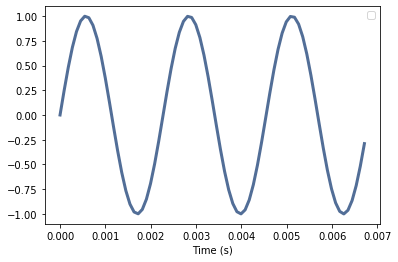

In [12]:
sin_sig1 = thinkdsp.SinSignal(freq=440, amp=1.0, offset=0)
sin_sig2 = thinkdsp.SinSignal(freq=450, amp=1.0, offset=0)
sin_sig1.plot()
thinkplot.config(xlabel='Time (s)')

wave0 = sin_sig1.make_wave(duration=10, start=0, framerate=11025)
wave0
from IPython.display import Audio
audio = Audio(data=wave0.ys, rate=wave0.framerate)
audio

** Change parameters in the following code, like frequency, duration, but make sure framerate is at least twice the highest frequency.**

No handles with labels found to put in legend.


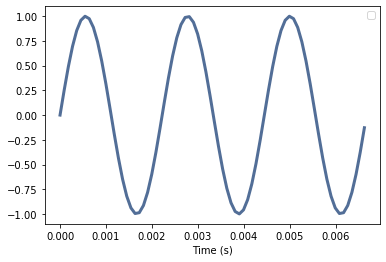

In [13]:
sin_sig2.plot()
thinkplot.config(xlabel='Time (s)')
wave1 = sin_sig2.make_wave(duration=2, start=0, framerate=11025)
wave1
from IPython.display import Audio
audio = Audio(data=wave1.ys, rate=wave1.framerate)
audio

Change the frequencies, play tones that are multiples of each other (harmonics) and see if you can detect any difference. Change the phase and see if you can hear a difference. Mostly likely not. 

### Mixing
Now that we have 2 functions, we can mix them (add them, superimpose them) and create a new wave that's a mix of the two. If you played around with the parameters above, set the frequencies of sin_sig1 to 440, and sin_sig2 to 436 and **re-run both cells to make that change stick**

Jupyter notebooks provides a widget that plays audio called Audio
or you can use `wave.make_audio( )` from ThinkDSP instead

No handles with labels found to put in legend.


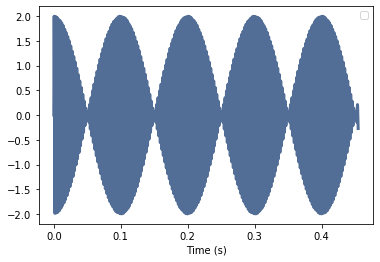

In [14]:
mix1 = sin_sig1 + sin_sig2
mix1

wave3 = mix1.make_wave(duration=4.0, start=0, framerate=11025)
wave3

period = mix1.period
segment = wave3.segment(start=0, duration=period*200)
period

segment.plot()
thinkplot.config(xlabel='Time (s)')

from IPython.display import Audio
audio = Audio(data=wave3.ys, rate=wave3.framerate)
audio


Change the duration above to capture more periods and rerun the cell. Change the duration of the wave if you want to hear it for a longer period. 

### BEATS
To understand what happens when we add two pure tones as above, we can use one of the many trigonametric identities for sin and cosine. For this particular instance this is useful identity :

$sin(\theta_1) + sin(\theta_2) = $
$2sin(\frac{1}{2}(\theta_1+\theta_2))cos(\frac{1}{2}(\theta_1-\theta_2))$

Setting the frequency of the first tone at 440 and the second tone at 436, here is an explanation of what you are hearing. 
From \[Benson pg. 20\] "... we perceive the combined effect as a sine wave with frequency 438 Hz, the average of the frequencies of the two strings, but with the amplitude modulated by a slow cosine wave with frequency 2 Hz, or half the difference between the frequencies of the two strings. This modulation is what we perceive as beats. The amplitude of the modulating cosine wave has two peaks per cycle, so the number of beats per second will be four, not two. So the number of beats per second is exactly the difference between the two frequencies."



## Reading and writing .wav files
The `read_wave()` reads .wav files into a wave. and the write function, writes a wave to a .wav file. Once you run the code, you will see that there is a new file in your environment called 'new_violin-B3.wav'. 

No handles with labels found to put in legend.


Writing new_violin-B3.wav


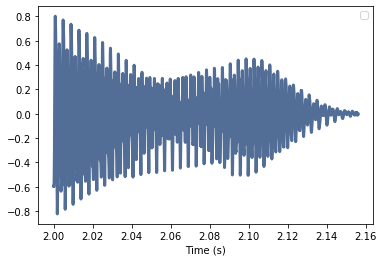

In [15]:
violin_wave = thinkdsp.read_wave('violin-B3.wav')

segment = violin_wave.segment(start=2, duration=2)
segment.plot()
thinkplot.config(xlabel='Time (s)')

violin_wave.write(filename='new_violin-B3.wav')
violin_wave.make_audio()

**Try uploading your own sound files, take a segment of them and plot the spectrum.**